In [3]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *

     |████████████████████████████████| 719 kB 8.5 MB/s 
     |████████████████████████████████| 5.8 MB 44.3 MB/s 
     |████████████████████████████████| 452 kB 64.0 MB/s 
     |████████████████████████████████| 1.3 MB 46.1 MB/s 
     |████████████████████████████████| 1.6 MB 72.8 MB/s 
     |████████████████████████████████| 182 kB 83.1 MB/s 
     |████████████████████████████████| 132 kB 53.6 MB/s 
     |████████████████████████████████| 213 kB 54.7 MB/s 
     |████████████████████████████████| 127 kB 63.8 MB/s 
     |████████████████████████████████| 7.6 MB 76.6 MB/s 


In [32]:

from fastai.vision.all import *
#0 
dest = '/content/DataML'
path = untar_data (URLs.PETS, data=dest)/'images' 
list(path.ls())
#1  label_func
def is_cat(x):  # Cat Labels = 1 or True
  return x[0].isupper() 
#2 item_tfms
### doc(ImageDataLoaders.from_name_func)  ???
dls = ImageDataLoaders.from_name_func(
    path=path, fnames=get_image_files(path),        
    valid_pct=0.2, seed=42, # testing set 
    bs =64, # Batch size
    label_func=is_cat, item_tfms=Resize(224)
)
## Overfitting 
## Optimum
## Underfitting

## Training set 
## Validation set (testing set)


In [33]:
learn = cnn_learner(dls, # use data_lodear dls
                    resnet34, # CNN Architecters res net 34 Layers 
                    metrics=error_rate)  # model Performance with claculation error_rate
learn.summary() # show CNN Model schema 
# checking the Total_traingable_params ?
learn.fine_tune(1) # Training set with (fine_tune()) 

epoch,train_loss,valid_loss,error_rate,time
0,0.167046,0.017503,0.008119,31:21


epoch,train_loss,valid_loss,error_rate,time
0,0.045880,0.022314,0.008796,44:21


In [ ]:
learn.summary() # show CNN Model schema 
# checking the Total_traingable_params = 21,813,056

In [34]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [39]:
img = PILImage.create(uploader.data[0])
pred,_,_ = learn.predict(img)
if pred == 'True': 
    print(f'Prediction: Cat')
else: 
    print(f'Prediction: Dog')
     

Prediction: Cat


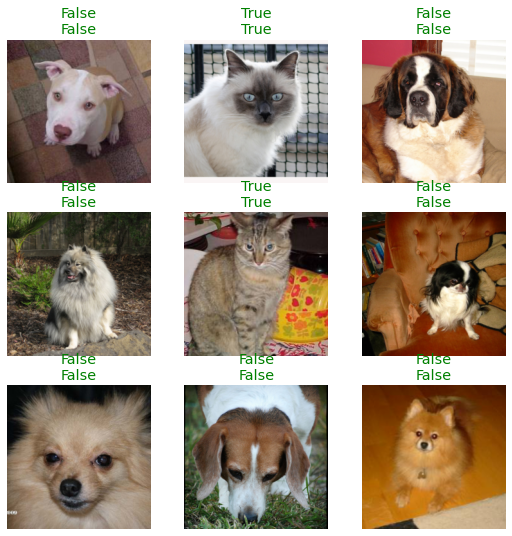

In [40]:
learn.show_results()

In [42]:
doc(ImageDataLoaders.from_name_func)

ImageDataLoaders.from_name_func(path: 'str | Path', fnames: 'list', label_func: 'callable', *, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, img_cls=<class 'fastai.vision.core.PILImage'>, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) -> 'DataLoaders'
Create from the name attrs of `fnames` in `path`s with `label_func`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev
